In [ ]:
from skimage.measure import compare_ssim
import numpy as np

from PIL import Image
import glob

# Get a list of all image files in the directory
image_files = glob.glob('/data/test/*.jpg')

# Load the images into a list
images = []
for file in image_files:
    image = Image.open(file)
    images.append(image)

# Create a list to hold the sequences of images
sequences = []

# Iterate over the images and compare them to each other
for i in range(len(images)):
    # Initialize a new sequence with the first image
    seq = [images[i]]
    # Compare the current image to the rest of the images
    for j in range(i+1, len(images)):
        ssim = compare_ssim(images[i], images[j])
        # If the structural similarity is above a certain threshold, add the image to the sequence
        if ssim > 0.8:
            seq.append(images[j])
    # Add the sequence to the list of sequences
    sequences.append(seq)


In [ ]:
pip list

In [ ]:
from skimage.metrics import structural_similarity
import numpy as np
from PIL import Image
import glob

# Get a list of all image files in the directory
image_files = glob.glob('/home/dataknight/CameraTrapChallenge/data/test/*.jpg')
image_files



In [ ]:
from skimage.metrics import structural_similarity
import numpy as np
from PIL import Image
import glob

# Get a list of all image files in the directory
image_files = glob.glob('/home/dataknight/CameraTrapChallenge/data/test/*.jpg')
image_files

images = []
for file in image_files:
    image = Image.open(file)
    images.append(image)

images

# Create a list to hold the sequences of images
sequences = []

# Iterate over the images and compare them to each other
for i in range(len(images)):
    # Initialize a new sequence with the first image
    seq = [images[i]]
    # Compare the current image to the rest of the images
    for j in range(i+1, len(images)):
        ssim = structural_similarity(images[i], images[j])
        # If the structural similarity is above a certain threshold, add the image to the sequence
        if ssim > 0.8:
            seq.append(images[j])
    # Add the sequence to the list of sequences
    sequences.append(seq)

sequences

In [ ]:
import glob

In [ ]:
from skimage.metrics import structural_similarity
import numpy as np
from PIL import Image
import glob

# Get a list of all image files in the directory
image_files = glob.glob('/home/dataknight/CameraTrapChallenge/data/test/*.jpg')
image_files

images = []
for file in image_files:
    image = Image.open(file)
    images.append(image)

images

Base File or Create Sequence of images and Masking The animal objects

In [ ]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

before = cv2.imread('/home/dataknight/CameraTrapChallenge/data/test/IMG2_2792.jpg')
after = cv2.imread('/home/dataknight/CameraTrapChallenge/data/test/IMG2_2776.jpg')

# GreyscaleConversion
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Provides SSIM Values 
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image similarity", score)
print(type(diff))
# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (0,255,0), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

#cv2.imshow('before', before)
#cv2.imshow('after', after)
#cv2.imshow('diff',diff)
#cv2.imshow('mask',mask)
#cv2.imshow('filled after',filled_after)
#cv2.waitKey(0)

In [ ]:
from skimage.metrics import structural_similarity
import numpy as np
from PIL import Image
import glob

# Get a list of all image files in the directory
image_files = glob.glob('/data/test/*.jpg')

# Load the images into a list
images = []
for file in image_files:
    image = Image.open(file)
    images.append(image)

# Create a list to hold the sequences of images
sequences = []

# Iterate over the images and compare them to each other
for i in range(len(images)):
    # Initialize a new sequence with the first image
    seq = [images[i]]
    # Compare the current image to the rest of the images
    for j in range(i+1, len(images)):
        ssim = structural_similarity(images[i], images[j])
        # If the structural similarity is above a certain threshold, add the image to the sequence
        if ssim > 0.8:
            seq.append(images[j])
    # Add the sequence to the list of sequences
    sequences.append(seq)

In [ ]:
type(diff)

In [ ]:
before_gray

In [ ]:
after_gray

In [ ]:
diff

In [ ]:
thresh

In [ ]:
contours

In [ ]:
contours(dim)

In [ ]:
contours.dim

In [11]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
from PIL import Image
import glob
import os

image_files = glob.glob('/home/dataknight/CameraTrapChallenge/data/test/*')
image_files

images = []
for file in image_files:
    image = Image.open(file)
    images.append(image)

images


before = cv2.imread('/home/dataknight/CameraTrapChallenge/data/test/IMG2_2792.jpg')
after = cv2.imread('/home/dataknight/CameraTrapChallenge/data/test/IMG2_2776.jpg')

# GreyscaleConversion
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Provides SSIM Values 
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image similarity", score)

Image similarity 0.8745437302868552


In [7]:
len(images)

12

In [13]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=R

In [16]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
from PIL import Image
import glob
import os


image_files = glob.glob('/home/dataknight/CameraTrapChallenge/data/test/*')
image_files

#images = []
#for file in image_files:
 #   image = Image.open(file)
 #   images.append(image)

#images

grays = []
for i in image_files:
    read_file = cv2.imread(image_files[i])
    gray = cv2.cvtColor(read_file, cv2.COLOR_BGR2GRAY)
    grays.append(gray)
    
grays

TypeError: list indices must be integers or slices, not str

In [17]:
image_files[1]

'/home/dataknight/CameraTrapChallenge/data/test/IMG_0122.JPG'

TypeError: list indices must be integers or slices, not str

In [21]:
import os
import cv2

# Set the directory path
directory = '/home/dataknight/CameraTrapChallenge/data/test'

# Get a list of all files in the directory
files = os.listdir(directory)

# Iterate through the list of files
for file in files:
    # Check if the file is an image file
    if file.endswith(('.JPG', '.jpg')):
        # Read the image file using cv2.imread()
        image = cv2.imread(os.path.join(directory, file))

        # Do something with the image (e.g., display it using cv2.imshow())
        cv2.imshow('Image', image)
        cv2.waitKey(0)

cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x3a1bb60) is not the object's thread (0x3e39ff0).
Cannot move to target thread (0x3a1bb60)

QObject::moveToThread: Current thread (0x3a1bb60) is not the object's thread (0x3e39ff0).
Cannot move to target thread (0x3a1bb60)

QObject::moveToThread: Current thread (0x3a1bb60) is not the object's thread (0x3e39ff0).
Cannot move to target thread (0x3a1bb60)

QObject::moveToThread: Current thread (0x3a1bb60) is not the object's thread (0x3e39ff0).
Cannot move to target thread (0x3a1bb60)

QObject::moveToThread: Current thread (0x3a1bb60) is not the object's thread (0x3e39ff0).
Cannot move to target thread (0x3a1bb60)

QObject::moveToThread: Current thread (0x3a1bb60) is not the object's thread (0x3e39ff0).
Cannot move to target thread (0x3a1bb60)

QObject::moveToThread: Current thread (0x3a1bb60) is not the object's thread (0x3e39ff0).
Cannot move to target thread (0x3a1bb60)

QObject::moveToThread: Current thread (0x3a1bb60) is not the object's thread

To Check SSIM of images and their images plotted side by side

0.21430893804539206


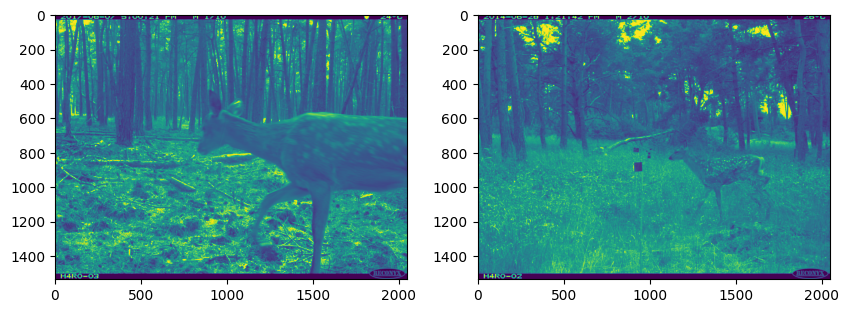

In [7]:
from skimage.metrics import structural_similarity
import os
import cv2
import matplotlib.pyplot as plt

# Set the directory path
directory = '/home/dataknight/CameraTrapChallenge/data/test'

# Get a list of all files in the directory
files = os.listdir(directory)

grayscale = []
for file in files:
    # Check if the file is an image file
    if file.endswith(('.JPG', '.jpg')):
        # Read the image file using cv2.imread()
        image = cv2.imread(os.path.join(directory, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grayscale.append(gray)

grayscale

(score, diff) = structural_similarity(grayscale[0], grayscale[2], full=True)
print(score)

fig, axes = plt.subplots(1, 2, figsize=(10, 7))
plt.sca(axes[0])
plt.imshow(grayscale[0])
plt.sca(axes[1])
plt.imshow(grayscale[2])
plt.show();

0.21430893804539206


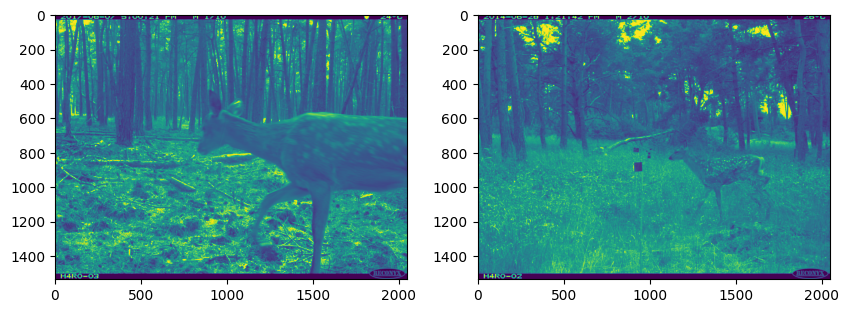

In [3]:
from skimage.metrics import structural_similarity
import os
import cv2
import matplotlib.pyplot as plt

# Set the directory path
directory = '/home/dataknight/CameraTrapChallenge/data/test'

# Get a list of all files in the directory
files = os.listdir(directory)


grayscale = []
for file in files:
    # Check if the file is an image file
    if file.endswith(('.JPG', '.jpg')):
        # Read the image file using cv2.imread()
        image = cv2.imread(os.path.join(directory, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grayscale.append(gray)

grayscale

(score, diff) = structural_similarity(grayscale[0], grayscale[2], full=True)
print(score)

sequences = []
gray_seq = []
for i in range(len(files)):

    seq = [files[i]]
    gseq = [grayscale[i]]
    
    for j in range(i+1, len(files)):
        ssim = structural_similarity(grayscale[i], grayscale[j])

        if ssim > 0.6:
            seq.append(files[j])
            gseq.append(grayscale[j])

    sequences.append(seq)
    gray_seq.append(gseq)
    


fig, axes = plt.subplots(1, 2, figsize=(10, 7))
plt.sca(axes[0])
plt.imshow(grayscale[0])
plt.sca(axes[1])
plt.imshow(grayscale[2])
plt.show();

In [8]:
from skimage.metrics import structural_similarity
import os
import cv2
import matplotlib.pyplot as plt

# Set the directory path
directory = '/home/dataknight/CameraTrapChallenge/data/test'

# Get a list of all files in the directory
files = os.listdir(directory)
file_index = [[i, file] for i, file in enumerate(files)]

file_index

[[0, 'IMG2_3067.jpg'],
 [1, 'IMG_0122.JPG'],
 [2, 'IMG_0117.JPG'],
 [3, 'IMG2_2792.jpg'],
 [4, 'IMG2_0647.jpg'],
 [5, 'IMG_0126.JPG'],
 [6, 'IMG_0121.JPG'],
 [7, 'IMG_0123.JPG'],
 [8, 'IMG_0119.JPG'],
 [9, 'IMG_0116.JPG'],
 [10, 'IMG_0124.JPG'],
 [11, 'IMG_0118.JPG'],
 [12, 'IMG_0120.JPG'],
 [13, 'IMG2_2776.jpg'],
 [14, 'IMG2_3072.jpg'],
 [15, 'IMG2_2808.jpg'],
 [16, 'IMG_0127.JPG'],
 [17, 'IMG_0125.JPG']]

In [9]:
file_index[1]

[1, 'IMG_0122.JPG']

TypeError: list indices must be integers or slices, not tuple

In [21]:
dim(sequences)

NameError: name 'dim' is not defined

In [30]:
len(sequences[0])

2

In [29]:
sequences[17]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [3]:
files

['IMG2_3067.jpg',
 'IMG_0122.JPG',
 'IMG_0117.JPG',
 'IMG2_2792.jpg',
 'IMG2_0647.jpg',
 'IMG_0126.JPG',
 'IMG_0121.JPG',
 'IMG_0123.JPG',
 'IMG_0119.JPG',
 'IMG_0116.JPG',
 'IMG_0124.JPG',
 'IMG_0118.JPG',
 'IMG_0120.JPG',
 'IMG2_2776.jpg',
 'IMG2_3072.jpg',
 'IMG2_2808.jpg',
 'IMG_0127.JPG',
 'IMG_0125.JPG']

In [5]:
sequences

[['IMG2_3067.jpg', 'IMG2_3072.jpg'],
 ['IMG_0122.JPG',
  'IMG_0117.JPG',
  'IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG_0117.JPG',
  'IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG2_2792.jpg', 'IMG2_2776.jpg', 'IMG2_2808.jpg'],
 ['IMG2_0647.jpg'],
 ['IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  '

In [8]:
sequences[0][0]
gray_seq[0][0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

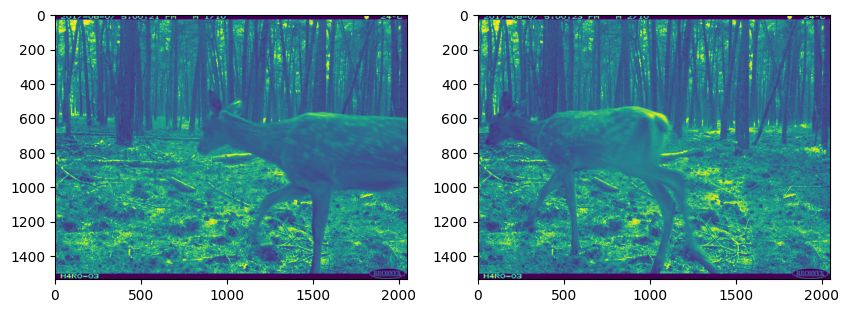

In [6]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(10, 40))
plt.sca(axes[0])
plt.imshow(gray_seq[0][0])
plt.sca(axes[1])
plt.imshow(gray_seq[0][1])
plt.show();

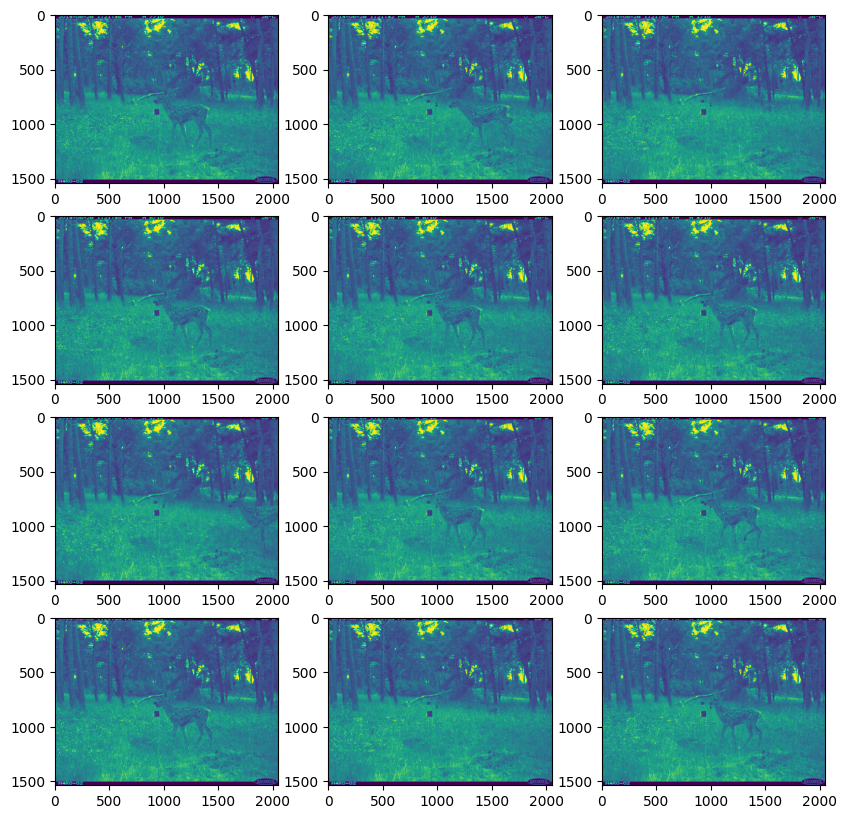

In [11]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(4, 3, figsize=(10,10))
plt.sca(axes[0][0])
plt.imshow(gray_seq[1][0])
plt.sca(axes[0][1])
plt.imshow(gray_seq[1][1])
plt.sca(axes[0][2])
plt.imshow(gray_seq[1][2])
plt.sca(axes[1][0])
plt.imshow(gray_seq[1][3])
plt.sca(axes[1][1])
plt.imshow(gray_seq[1][4])
plt.sca(axes[1][2])
plt.imshow(gray_seq[1][5])
plt.sca(axes[2][0])
plt.imshow(gray_seq[1][6])
plt.sca(axes[2][1])
plt.imshow(gray_seq[1][7])
plt.sca(axes[2][2])
plt.imshow(gray_seq[1][8])
plt.sca(axes[3][0])
plt.imshow(gray_seq[1][9])
plt.sca(axes[3][1])
plt.imshow(gray_seq[1][10])
plt.sca(axes[3][2])
plt.imshow(gray_seq[1][11])
plt.show();

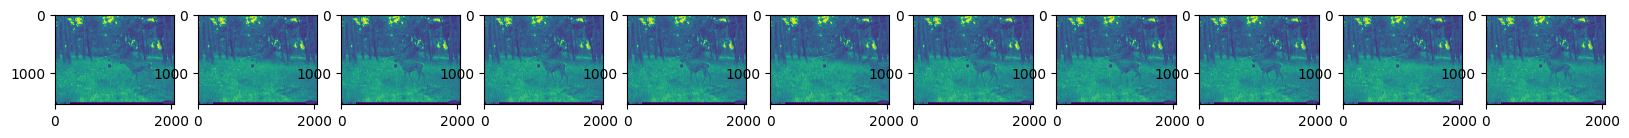

In [12]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 11, figsize=(20,7))
plt.sca(axes[0])
plt.imshow(gray_seq[2][0])
plt.sca(axes[1])
plt.imshow(gray_seq[2][1])
plt.sca(axes[2])
plt.imshow(gray_seq[2][2])
plt.sca(axes[3])
plt.imshow(gray_seq[2][3])
plt.sca(axes[4])
plt.imshow(gray_seq[2][4])
plt.sca(axes[5])
plt.imshow(gray_seq[2][5])
plt.sca(axes[6])
plt.imshow(gray_seq[2][6])
plt.sca(axes[7])
plt.imshow(gray_seq[2][7])
plt.sca(axes[8])
plt.imshow(gray_seq[2][8])
plt.sca(axes[9])
plt.imshow(gray_seq[2][9])
plt.sca(axes[10])
plt.imshow(gray_seq[2][10])
plt.show();

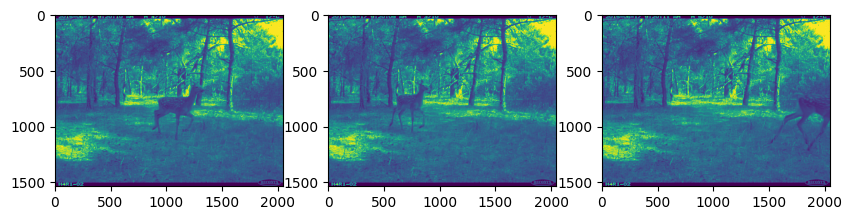

In [15]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(10,7))
plt.sca(axes[0])
plt.imshow(gray_seq[3][0])
plt.sca(axes[1])
plt.imshow(gray_seq[3][1])
plt.sca(axes[2])
plt.imshow(gray_seq[3][2])
plt.show();

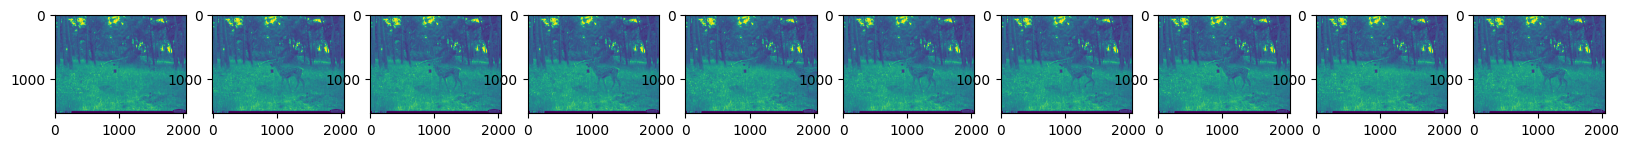

In [16]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 10, figsize=(20,7))
plt.sca(axes[0])
plt.imshow(gray_seq[5][0])
plt.sca(axes[1])
plt.imshow(gray_seq[5][1])
plt.sca(axes[2])
plt.imshow(gray_seq[5][2])
plt.sca(axes[3])
plt.imshow(gray_seq[5][3])
plt.sca(axes[4])
plt.imshow(gray_seq[5][4])
plt.sca(axes[5])
plt.imshow(gray_seq[5][5])
plt.sca(axes[6])
plt.imshow(gray_seq[5][6])
plt.sca(axes[7])
plt.imshow(gray_seq[5][7])
plt.sca(axes[8])
plt.imshow(gray_seq[5][8])
plt.sca(axes[9])
plt.imshow(gray_seq[5][9])
plt.show();

0.21430893804539206


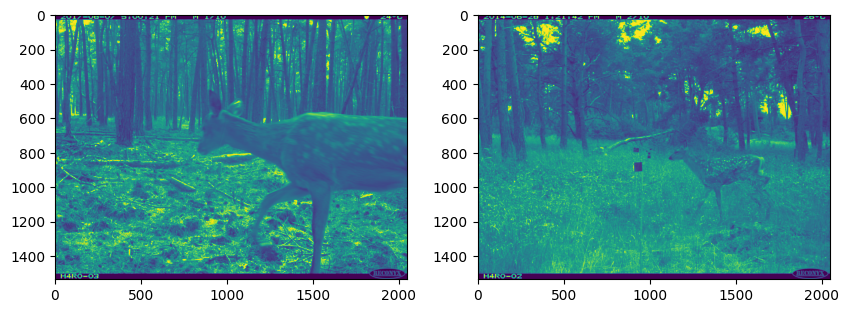

In [34]:
from skimage.metrics import structural_similarity
import os
import cv2
import matplotlib.pyplot as plt

# Set the directory path
directory = '/home/dataknight/CameraTrapChallenge/data/test'

# Get a list of all files in the directory
files = os.listdir(directory)


grayscale = []
for file in files:
    # Check if the file is an image file
    if file.endswith(('.JPG', '.jpg')):
        # Read the image file using cv2.imread()
        image = cv2.imread(os.path.join(directory, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grayscale.append(gray)

grayscale

(score, diff) = structural_similarity(grayscale[0], grayscale[2], full=True)
print(score)

sequences = []
gray_seq = []
loop_i = []
loop_j = []
for i in range(len(files)):
    loop_i.append(i)
    seq = {files[i]}
    gseq = [grayscale[i]]
    for j in range(len(files)):
        loop_j.append(j)
        ssim = structural_similarity(grayscale[i], grayscale[j])
        if ssim > 0.6 and i!=j:
            seq.add(files[j])
            gseq.append(grayscale[j])
    sequences.append(seq)
    gray_seq.append(gseq)    

result_file_name = list()
for item in sequences:
    if item not in result_file_name:
        result_file_name.append(item)
    
fig, axes = plt.subplots(1, 2, figsize=(10, 7))
plt.sca(axes[0])
plt.imshow(grayscale[0])
plt.sca(axes[1])
plt.imshow(grayscale[2])
plt.show();

In [2]:
loop_j

[17, 17]

In [3]:
loop_i

[17, 17]

In [5]:
loop_i

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [6]:
loop_j

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 12,
 13,
 14,
 15,
 16,
 17,
 13,
 14,
 15,
 16,
 17,
 14,
 15,
 16,
 17,
 15,
 16,
 17,
 16,
 17,
 17]

In [9]:
loop_i

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [10]:
loop_j

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,


In [11]:
sequences

[['IMG2_3067.jpg', 'IMG2_3067.jpg', 'IMG2_3072.jpg'],
 ['IMG_0122.JPG',
  'IMG_0122.JPG',
  'IMG_0117.JPG',
  'IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG_0117.JPG',
  'IMG_0122.JPG',
  'IMG_0117.JPG',
  'IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG2_2792.jpg', 'IMG2_2792.jpg', 'IMG2_2776.jpg', 'IMG2_2808.jpg'],
 ['IMG2_0647.jpg', 'IMG2_0647.jpg'],
 ['IMG_0126.JPG',
  'IMG_0122.JPG',
  'IMG_0117.JPG',
  'IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0117.JPG',
  'IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_

In [14]:
sequences

[['IMG2_3067.jpg', 'IMG2_3072.jpg'],
 ['IMG_0122.JPG',
  'IMG_0117.JPG',
  'IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG_0117.JPG',
  'IMG_0122.JPG',
  'IMG_0126.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG2_2792.jpg', 'IMG2_2776.jpg', 'IMG2_2808.jpg'],
 ['IMG2_0647.jpg'],
 ['IMG_0126.JPG',
  'IMG_0122.JPG',
  'IMG_0117.JPG',
  'IMG_0121.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0117.JPG',
  'IMG_0126.JPG',
  'IMG_0123.JPG',
  'IMG_0119.JPG',
  'IMG_0116.JPG',
  'IMG_0124.JPG',
  'IMG_0118.JPG',
  'IMG_0120.JPG',
  'IMG_0127.JPG',
  'IMG_0125.JPG'],
 ['IMG_0123.JPG',
  '

In [15]:
sequences [0]

['IMG2_3067.jpg', 'IMG2_3072.jpg']

In [22]:
sequences[14]

{'IMG2_3067.jpg', 'IMG2_3072.jpg'}

In [21]:
if sequences[0]==sequences[14]:
    print("yes")
else:
    print("no")

yes


In [23]:
sequences

[{'IMG2_3067.jpg', 'IMG2_3072.jpg'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG2_2776.jpg', 'IMG2_2792.jpg', 'IMG2_2808.jpg'},
 {'IMG2_0647.jpg'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG_0116.JPG',
  '

set()

In [28]:
sequences

[{'IMG2_3067.jpg', 'IMG2_3072.jpg'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG2_2776.jpg', 'IMG2_2792.jpg', 'IMG2_2808.jpg'},
 {'IMG2_0647.jpg'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG_0116.JPG',
  '

In [29]:
mylist = ["a", "b", "a", "c", "c"]
mylist = list(dict.fromkeys(mylist))
print(mylist)

['a', 'b', 'c']


In [31]:
result = list()
for item in sequences:
    if item not in result:
        result.append(item)

In [32]:
result

[{'IMG2_3067.jpg', 'IMG2_3072.jpg'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG2_2776.jpg', 'IMG2_2792.jpg', 'IMG2_2808.jpg'},
 {'IMG2_0647.jpg'}]

In [35]:
from skimage.metrics import structural_similarity
import os
import cv2
import matplotlib.pyplot as plt

# Set the directory path
directory = '/home/dataknight/CameraTrapChallenge/data/test'

# Get a list of all files in the directory
files = os.listdir(directory)

grayscale = []
for file in files:
    # Check if the file is an image file
    if file.endswith(('.JPG', '.jpg')):
        # Read the image file using cv2.imread()
        image = cv2.imread(os.path.join(directory, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grayscale.append(gray)

sequences = []
gray_seq = []

for i in range(len(files)):
    seq = {files[i]}
    gseq = [grayscale[i]]
    for j in range(len(files)):
        ssim = structural_similarity(grayscale[i], grayscale[j])
        if ssim > 0.6 and i!=j:
            seq.add(files[j])
            gseq.append(grayscale[j])
    sequences.append(seq)
    gray_seq.append(gseq)    

result_file_name = list()
for item in sequences:
    if item not in result_file_name:
        result_file_name.append(item)

result_file_name

[{'IMG2_3067.jpg', 'IMG2_3072.jpg'},
 {'IMG_0116.JPG',
  'IMG_0117.JPG',
  'IMG_0118.JPG',
  'IMG_0119.JPG',
  'IMG_0120.JPG',
  'IMG_0121.JPG',
  'IMG_0122.JPG',
  'IMG_0123.JPG',
  'IMG_0124.JPG',
  'IMG_0125.JPG',
  'IMG_0126.JPG',
  'IMG_0127.JPG'},
 {'IMG2_2776.jpg', 'IMG2_2792.jpg', 'IMG2_2808.jpg'},
 {'IMG2_0647.jpg'}]